# general


In [401]:
#Bloque de importaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score, DistanceMetric
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import preprocessing
import gower
import prince

from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn_extra.cluster import KMedoids

import umap

import io
import math
import pandas as pd
import numpy as np

from community import community_louvain
import networkx as nx

from matplotlib import gridspec
import matplotlib.pyplot as plt
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, scale_color_discrete, labs
from plotnine.data import mtcars

In [402]:
data = pd.read_csv(r'C:\Users\nicot\Mi unidad\Notebooks\Colab Notebooks\TIC I\Diabetes datasets\diabetes_binary_health_indicators_BRFSS2015.csv')

In [403]:
df = data.copy()
#mostraremos todas las columnas
pd.set_option('display.max_columns', None)

In [404]:
#Eliminar duplicados
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

0


In [405]:
#Buscar duplicados
df.duplicated().sum()

0

In [406]:
df = df.drop(['GenHlth', 'AnyHealthcare', 'NoDocbcCost','DiffWalk'], axis=1)
var_categorica = ['Diabetes_binary','Sex','HighBP','Smoker','HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies','HighChol',
                  'CholCheck','Stroke','HeartDiseaseorAttack']
var_numericas = ['BMI','Income','Education','Age', 'MentHlth','PhysHlth' ]

In [407]:
df_clean = df.copy()
df_clean = df_clean.astype(str)
df_clean.shape

(229474, 18)

<class 'pandas.core.series.Series'>
Int64Index: 22948 entries, 218669 to 220987
Series name: Diabetes_binary
Non-Null Count  Dtype 
--------------  ----- 
22948 non-null  object
dtypes: object(1)
memory usage: 358.6+ KB


In [409]:
df_predict = df_clean.copy()
df_predict

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
218669,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,4.0,6.0
244223,0.0,0.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,7.0
9423,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.0,0.0,11.0,6.0,8.0
32992,0.0,0.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,4.0,6.0
70416,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.0,5.0,6.0
3952,1.0,1.0,1.0,1.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29.0,1.0,6.0,4.0,6.0
144674,1.0,1.0,1.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,7.0,0.0,7.0,6.0,4.0
46620,1.0,1.0,1.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,10.0,0.0,9.0,4.0,4.0


In [410]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22948 entries, 218669 to 220987
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Diabetes_binary       22948 non-null  object
 1   HighBP                22948 non-null  object
 2   HighChol              22948 non-null  object
 3   CholCheck             22948 non-null  object
 4   BMI                   22948 non-null  object
 5   Smoker                22948 non-null  object
 6   Stroke                22948 non-null  object
 7   HeartDiseaseorAttack  22948 non-null  object
 8   PhysActivity          22948 non-null  object
 9   Fruits                22948 non-null  object
 10  Veggies               22948 non-null  object
 11  HvyAlcoholConsump     22948 non-null  object
 12  MentHlth              22948 non-null  object
 13  PhysHlth              22948 non-null  object
 14  Sex                   22948 non-null  object
 15  Age                   22948 no

In [411]:
#Estandarización
scaler = StandardScaler()

df_predict[var_numericas] = scaler.fit_transform(df_predict[var_numericas])

round(df_predict[var_numericas].describe(),2)

,BMI,Income,Education,Age,MentHlth,PhysHlth
count,22948.00,22948.00,22948.00,22948.00,22948.00,22948.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.41,-2.33,-3.98,-2.27,-0.46,-0.52
25%,-0.68,-0.89,-0.98,-0.67,-0.46,-0.52
50%,-0.25,0.06,0.02,-0.03,-0.46,-0.52
75%,0.48,1.02,1.02,0.62,-0.20,-0.08
max,10.01,1.02,1.02,1.58,3.41,2.79


In [412]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22948 entries, 218669 to 220987
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       22948 non-null  object 
 1   HighBP                22948 non-null  object 
 2   HighChol              22948 non-null  object 
 3   CholCheck             22948 non-null  object 
 4   BMI                   22948 non-null  float64
 5   Smoker                22948 non-null  object 
 6   Stroke                22948 non-null  object 
 7   HeartDiseaseorAttack  22948 non-null  object 
 8   PhysActivity          22948 non-null  object 
 9   Fruits                22948 non-null  object 
 10  Veggies               22948 non-null  object 
 11  HvyAlcoholConsump     22948 non-null  object 
 12  MentHlth              22948 non-null  float64
 13  PhysHlth              22948 non-null  float64
 14  Sex                   22948 non-null  object 
 15  Age          

In [413]:
df_predict[var_categorica] = df_predict[var_categorica].astype(float)
df_predict[var_categorica] = df_predict[var_categorica].astype(int)
df_predict.dtypes


Diabetes_binary           int32
HighBP                    int32
HighChol                  int32
CholCheck                 int32
BMI                     float64
Smoker                    int32
Stroke                    int32
HeartDiseaseorAttack      int32
PhysActivity              int32
Fruits                    int32
Veggies                   int32
HvyAlcoholConsump         int32
MentHlth                float64
PhysHlth                float64
Sex                       int32
Age                     float64
Education               float64
Income                  float64
dtype: object

# KNN


Rejillas


In [414]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [415]:
# Crear el objeto KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [416]:
df_predict.shape[0]**0.5

151.4859729479928

In [417]:
from sklearn.model_selection import GridSearchCV

params = [{'n_neighbors': [151,107,479],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20]}]
grid = GridSearchCV(knn, 
                    params, 
                    scoring='accuracy',
                    cv=10)

grid.fit(df_predict[df_predict.columns[1:]].values,df_predict['Diabetes_binary'].values)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [15, 20], 'n_neighbors': [151, 107, 479],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [418]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_algorithm',
 'param_leaf_size',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [419]:
grid.cv_results_["params"]

[{'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 151,
  'weights': 'uniform'},
 {'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 151,
  'weights': 'distance'},
 {'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 107,
  'weights': 'uniform'},
 {'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 107,
  'weights': 'distance'},
 {'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 479,
  'weights': 'uniform'},
 {'algorithm': 'auto',
  'leaf_size': 15,
  'n_neighbors': 479,
  'weights': 'distance'},
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 151,
  'weights': 'uniform'},
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 151,
  'weights': 'distance'},
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 107,
  'weights': 'uniform'},
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 107,
  'weights': 'distance'},
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 479,
  'weights': 'uniform'},
 {'algorithm': '

In [420]:
print(grid.cv_results_["rank_test_score"])
print(grid.cv_results_["mean_test_score"])
print(grid.best_score_)
print(grid.best_params_)

[ 9 33  3 27 17 41  9 33  3 27 17 41  9 33  1 25 17 41  9 33  1 25 17 41
  9 33  3 27 17 41  9 33  3 27 17 41  9 33  3 27 17 41  9 33  3 27 17 41]
[0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533
 0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533
 0.84883194 0.84674042 0.84944202 0.84687116 0.84708904 0.84460533
 0.84883194 0.84674042 0.84944202 0.84687116 0.84708904 0.84460533
 0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533
 0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533
 0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533
 0.84883194 0.84674042 0.84939845 0.84682759 0.84708904 0.84460533]
0.849442022667829
{'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 107, 'weights': 'uniform'}


In [421]:
mejor_modelo_knn = grid.best_estimator_

print(mejor_modelo_knn)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=107)


Accuracy: 0.8457516339869281
Confusion Matrix:
[[3862   14]
 [ 694   20]]
Fold 1 Accuracy: 0.7768489167892487
Fold 2 Accuracy: 0.7749946478270178
Fold 3 Accuracy: 0.7845218968049944
Fold 4 Accuracy: 0.7889299485861183
Fold 5 Accuracy: 0.7846951891296364
Fold 6 Accuracy: 0.7804696107234669
Fold 7 Accuracy: 0.7882344840249724
Fold 8 Accuracy: 0.781188027910393
Fold 9 Accuracy: 0.7512208493425842
Fold 10 Accuracy: 0.8007804221835235
Promedio de Accuracy: 0.7811883993321954


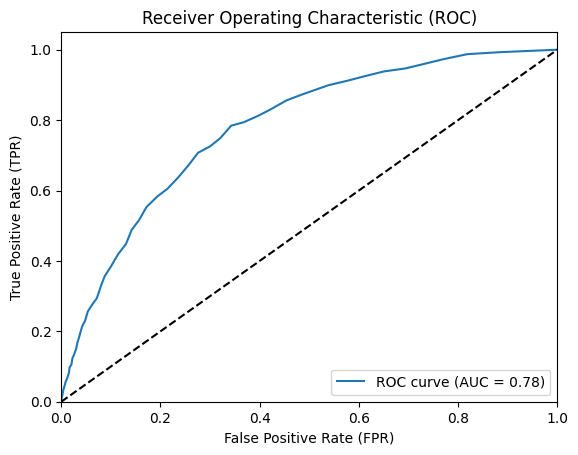

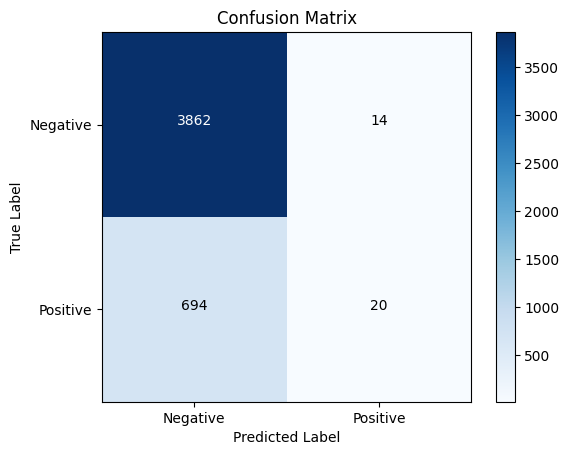

In [422]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import itertools 

X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
mejor_modelo_knn = grid.best_estimator_
# Cross-validation
cv_scores = cross_val_score(mejor_modelo_knn, X_train, y_train, cv=10, scoring='roc_auc')

# Training
mejor_modelo_knn.fit(X_train, y_train)

# Accuracy
y_pred = mejor_modelo_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predictions on the test set
y_scores = mejor_modelo_knn.predict_proba(X_test)[:, 1]

# FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate area under the ROC curve
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding labels to the heatmap
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, f'{conf_matrix[i, j]}', horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
    
# Print Cross-validation scores
for index, element in enumerate(cv_scores):
    print(f"Fold {index+1} Accuracy: {element}")
#print("Cross-validation Accuracy scores:", cv_scores)
print("Promedio de Accuracy:", np.mean(cv_scores))

plt.show()

# Random Forest Classifier


In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear el objeto RFC
rf_classifier =  RandomForestClassifier()
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [424]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [425]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_classifier
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_classifier , param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df_predict[df_predict.columns[1:]].values,df_predict['Diabetes_binary'].values)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [426]:
sorted(rf_random.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [427]:
rf_random.cv_results_["params"]

[{'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 50,
  'bootstrap': True},
 {'n_estimators': 600,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 90,
  'bootstrap': False},
 {'n_estimators': 600,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'auto',
  'max_depth': 60,
  'bootstrap': False},
 {'n_estimators': 1400,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 30,
  'bootstrap': True},
 {'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 80,
  'bootstrap': False},
 {'n_estimators': 400,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 60,
  'bootstrap': False},
 {'n_estimators': 2000,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'auto',
  'max_depth': 50,
  'bootstrap': False},
 

In [428]:
print(rf_random.cv_results_["rank_test_score"])
print(rf_random.cv_results_["mean_test_score"])
print(rf_random.best_score_)
print(rf_random.best_params_)

[ 3  5  9  6  7  8 10  1  2  4]
[0.84935503 0.84809143 0.84416969 0.84647923 0.84626135 0.84560766
 0.84373404 0.85022655 0.84966006 0.84839646]
0.8502265453309097
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [429]:
rf_classifier = rf_random.best_estimator_
print(rf_classifier)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)


Accuracy: 0.8470588235294118
Confusion Matrix:
[[3827   49]
 [ 653   61]]
Fold 1 Accuracy: 0.7892532970536577
Fold 2 Accuracy: 0.7944040441709657
Fold 3 Accuracy: 0.7841236687477048
Fold 4 Accuracy: 0.7880302056555268
Fold 5 Accuracy: 0.7991874770473743
Fold 6 Accuracy: 0.7976771942710246
Fold 7 Accuracy: 0.8056876606683805
Fold 8 Accuracy: 0.7937178663239075
Fold 9 Accuracy: 0.7550941666436318
Fold 10 Accuracy: 0.8072647446351734
Promedio de Accuracy: 0.7914440325217347


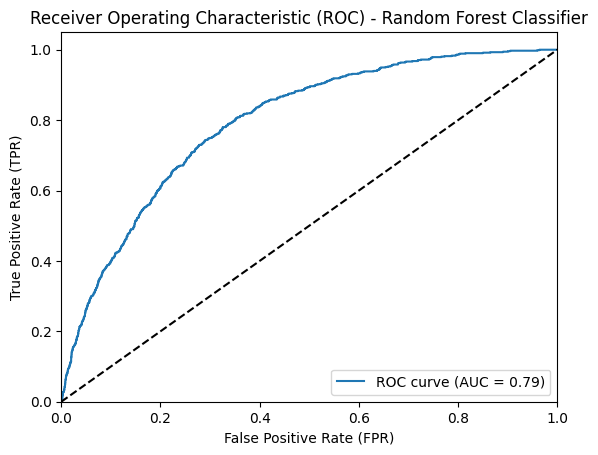

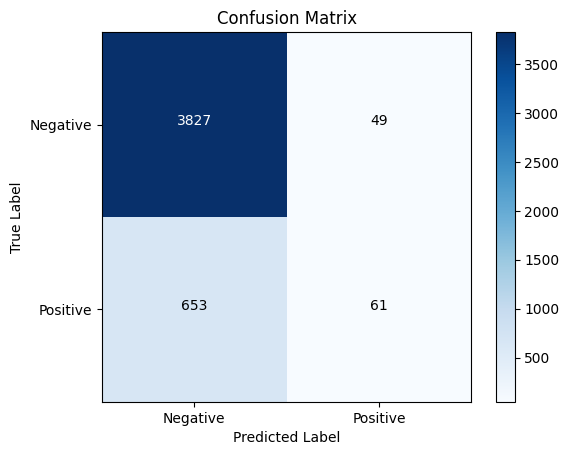

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import itertools 

X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
rf_classifier
# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='roc_auc')

# Training
rf_classifier.fit(X_train, y_train)

# Accuracy
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# CM
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Prediccciones
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
auc_score = auc(fpr, tpr)

# curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest Classifier')
plt.legend(loc='lower right')

# CM plot
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding labels to the heatmap
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, f'{conf_matrix[i, j]}', horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
    
# Print Cross-validation scores
for index, element in enumerate(cv_scores):
    print(f"Fold {index+1} Accuracy: {element}")
print("Promedio de Accuracy:", np.mean(cv_scores))

plt.show()

# Gradient Boosting Classifier

In [431]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier()
gb_classifier.get_params()



{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [432]:
from sklearn.model_selection import RandomizedSearchCV
#GBoosting
loss = ['log_loss','exponential']
n_estimators = [100,500,1000]
learning_rate = [0.1,0.05,0.01]
subsample = [0.5,1.0]
criterion = ['friedman_mse', 'squared_error']
gbc_grid = { 'loss': loss,
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'criterion': criterion}

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [433]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb_classifier
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb_classifier , param_distributions = gbc_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(df_predict[df_predict.columns[1:]].values,df_predict['Diabetes_binary'].values)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'loss': ['log_loss', 'exponential'],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.5, 1.0]},
                   random_state=42, verbose=2)

In [434]:
print(gb_random.cv_results_["rank_test_score"])
print(gb_random.cv_results_["mean_test_score"])
print(gb_random.best_score_)
print(gb_random.best_params_)

[10  3  6  4  7  8  9  5  1  2]
[0.84460517 0.85114148 0.85083638 0.85092364 0.85079296 0.84931132
 0.84464854 0.85083642 0.85144663 0.85118502]
0.8514466268925472
{'subsample': 0.5, 'n_estimators': 100, 'loss': 'log_loss', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}


Accuracy: 0.8492374727668845
Confusion Matrix:
[[3810   66]
 [ 626   88]]
Fold 1 Accuracy: 0.7982852328367898
Fold 2 Accuracy: 0.7966312387345391
Fold 3 Accuracy: 0.7889173246419391
Fold 4 Accuracy: 0.7873290029379361
Fold 5 Accuracy: 0.7913744032317298
Fold 6 Accuracy: 0.7987100624311421
Fold 7 Accuracy: 0.8105031215571061
Fold 8 Accuracy: 0.8053376331252295
Fold 9 Accuracy: 0.7579827422579724
Fold 10 Accuracy: 0.8121619629414636
Promedio de Accuracy: 0.7947232724695847


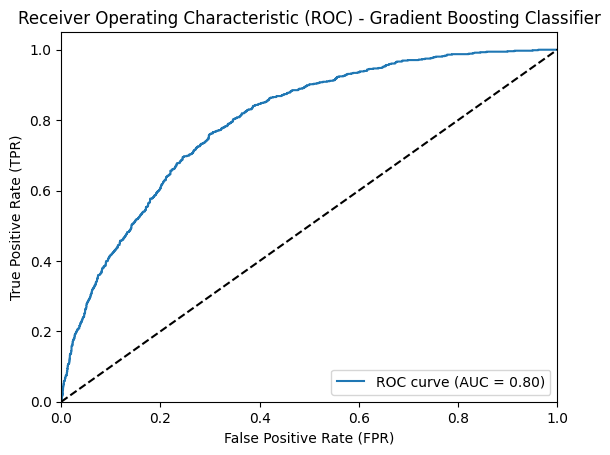

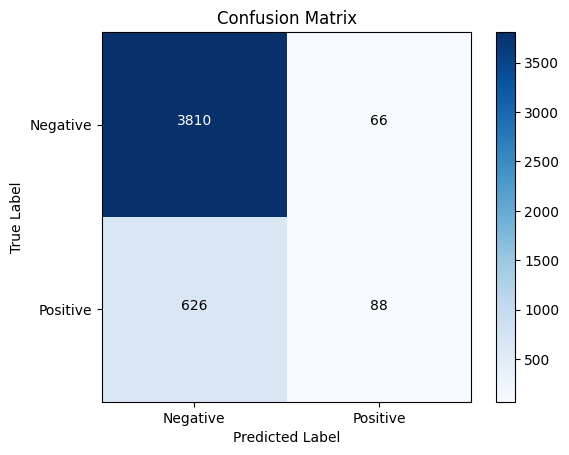

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import itertools 

gb_classifier = gb_random.best_estimator_

X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=10, scoring='roc_auc')

# Training
gb_classifier.fit(X_train, y_train)

# Accuracy
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predictions on the test set
y_scores = gb_classifier.predict_proba(X_test)[:, 1]

# FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate area under the ROC curve
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc='lower right')

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding labels to the heatmap
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, f'{conf_matrix[i, j]}', horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
    
# Print Cross-validation scores
for index, element in enumerate(cv_scores):
    print(f"Fold {index+1} Accuracy: {element}")
print("Promedio de Accuracy:", np.mean(cv_scores))

plt.show()


# DTC


In [439]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
# Crear el objeto DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.get_params()
dtc_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [441]:
dtc_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [443]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtc
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtc_random = RandomizedSearchCV(estimator = dtc , param_distributions = dtc_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtc_random.fit(df_predict[df_predict.columns[1:]].values,df_predict['Diabetes_binary'].values)

c:\Users\nicot\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.


Fitting 10 folds for each of 90 candidates, totalling 900 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=42, verbose=2)

In [445]:
print(dtc_random.cv_results_["rank_test_score"])
print(dtc_random.cv_results_["mean_test_score"])
print(dtc_random.best_score_)
print(dtc_random.best_params_)

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 81 10  7 80 88  1 12  5 87  8 12  9
 84 84  4 86 12 90  2 76 83 89  2 12  6 82 78 79 11 77]
[0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549 0.84704549
 0.84687112 0.84713264 0.84752479 0.8468712  0.84652261

Accuracy: 0.844880174291939
Confusion Matrix:
[[3777   99]
 [ 613  101]]
Fold 1 Accuracy: 0.7266225141170757
Fold 2 Accuracy: 0.7071083763233679
Fold 3 Accuracy: 0.7334442710246051
Fold 4 Accuracy: 0.7386315644509731
Fold 5 Accuracy: 0.6938877157546823
Fold 6 Accuracy: 0.690975027543151
Fold 7 Accuracy: 0.7494548751377157
Fold 8 Accuracy: 0.7161311053984577
Fold 9 Accuracy: 0.6841720337967954
Fold 10 Accuracy: 0.6901818374473653
Promedio de Accuracy: 0.7130609320994189


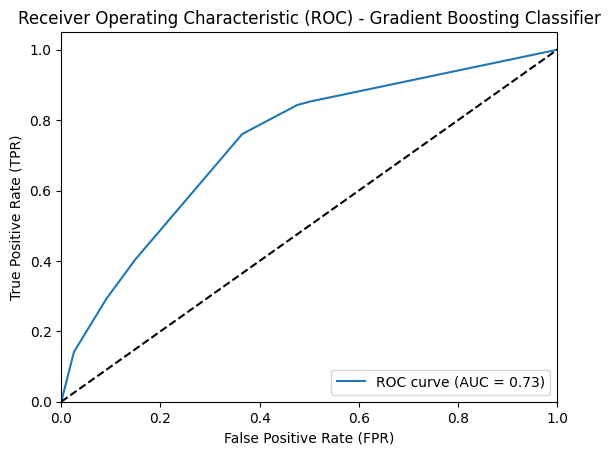

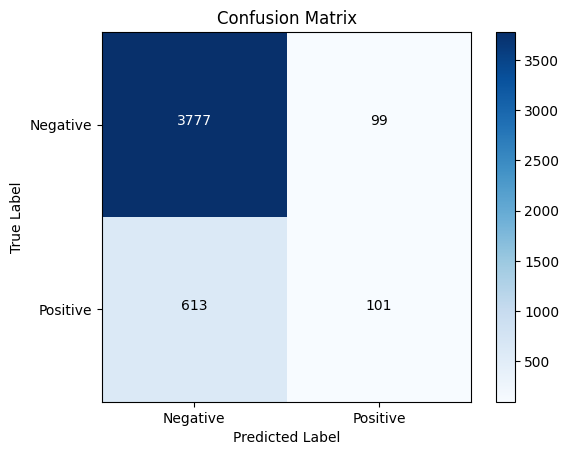

In [447]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import itertools 

dtc = dtc_random.best_estimator_

X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation
cv_scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring='roc_auc')

# Training
dtc.fit(X_train, y_train)

# Accuracy
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predictions on the test set
y_scores = dtc.predict_proba(X_test)[:, 1]

# FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate area under the ROC curve
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc='lower right')

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding labels to the heatmap
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, f'{conf_matrix[i, j]}', horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
    
# Print Cross-validation scores
for index, element in enumerate(cv_scores):
    print(f"Fold {index+1} Accuracy: {element}")
print("Promedio de Accuracy:", np.mean(cv_scores))

plt.show()

# Todos juntos y test de hipotesis


GBC
Fold 1 - Error en validación: 0.2668845315904139, Error en test: 0.2825708061002179
Fold 2 - Error en validación: 0.2663398692810458, Error en test: 0.2660130718954249
Fold 3 - Error en validación: 0.2919389978213508, Error en test: 0.2712418300653595
Fold 4 - Error en validación: 0.30010893246187365, Error en test: 0.28801742919389983
Fold 5 - Error en validación: 0.2990196078431373, Error en test: 0.3010893246187364
Fold 6 - Error en validación: 0.2990196078431373, Error en test: 0.29063180827886714
Fold 7 - Error en validación: 0.28649237472766886, Error en test: 0.287363834422658
Fold 8 - Error en validación: 0.303921568627451, Error en test: 0.2925925925925926
Fold 9 - Error en validación: 0.3525885558583106, Error en test: 0.3252723311546841
Fold 10 - Error en validación: 0.2604904632152588, Error en test: 0.27189542483660134
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.15267672902309845


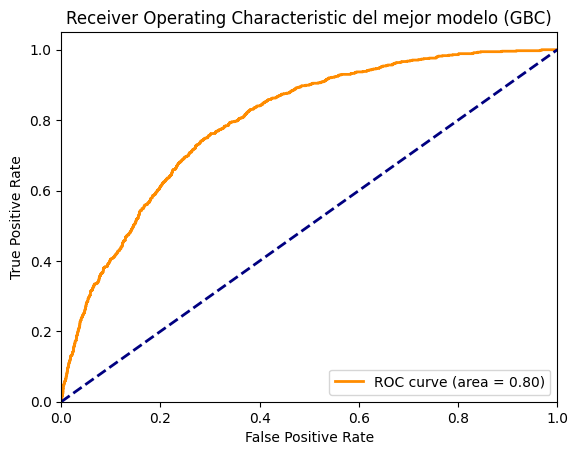

Mejor umbral: 0.15267672902309845

Matriz de confusión del mejor modelo:
[[2728 1148]
 [ 176  538]]


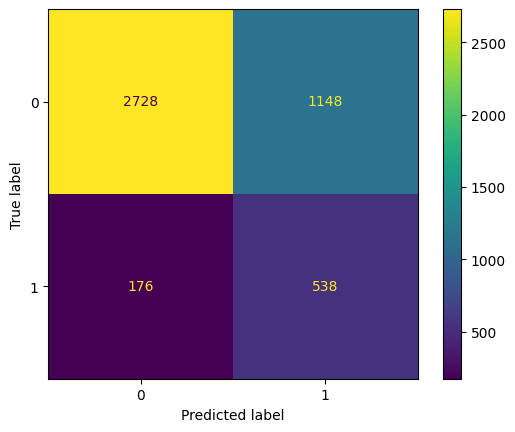


RFC
Fold 1 - Error en validación: 0.2941176470588235, Error en test: 0.3058823529411765
Fold 2 - Error en validación: 0.2924836601307189, Error en test: 0.27472766884531585
Fold 3 - Error en validación: 0.33769063180827885, Error en test: 0.32352941176470584
Fold 4 - Error en validación: 0.278322440087146, Error en test: 0.2705882352941177
Fold 5 - Error en validación: 0.289760348583878, Error en test: 0.2947712418300653
Fold 6 - Error en validación: 0.3110021786492375, Error en test: 0.3037037037037037
Fold 7 - Error en validación: 0.30501089324618735, Error en test: 0.3084967320261438
Fold 8 - Error en validación: 0.3061002178649237, Error en test: 0.2869281045751634
Fold 9 - Error en validación: 0.29427792915531337, Error en test: 0.2779956427015251
Fold 10 - Error en validación: 0.31389645776566755, Error en test: 0.31394335511982574
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.16399999999999998


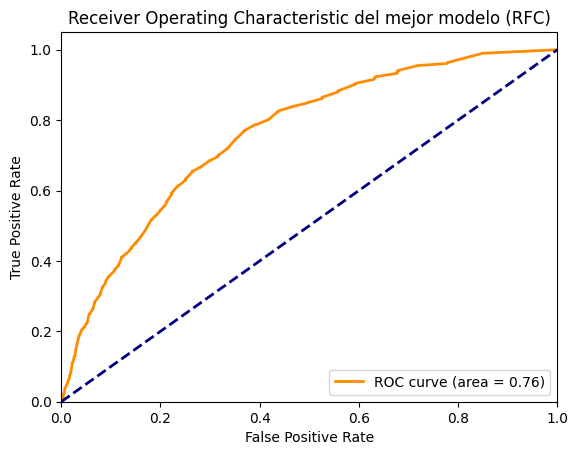

Mejor umbral: 0.16399999999999998

Matriz de confusión del mejor modelo:
[[2649 1227]
 [ 215  499]]


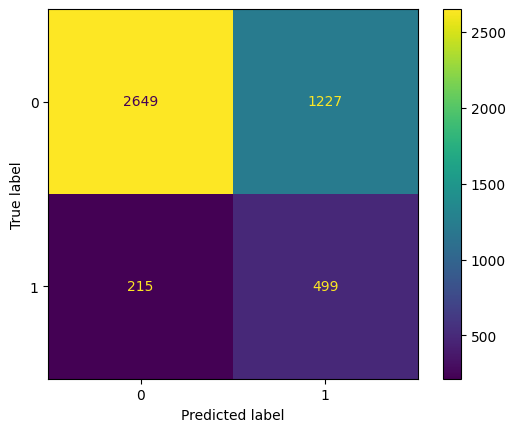


KNN
Fold 1 - Error en validación: 0.27233115468409586, Error en test: 0.2895424836601307
Fold 2 - Error en validación: 0.31209150326797386, Error en test: 0.29542483660130714
Fold 3 - Error en validación: 0.2799564270152506, Error en test: 0.2679738562091504
Fold 4 - Error en validación: 0.2826797385620915, Error en test: 0.2779956427015251
Fold 5 - Error en validación: 0.26034858387799564, Error en test: 0.26339869281045747
Fold 6 - Error en validación: 0.2984749455337691, Error en test: 0.2949891067538126
Fold 7 - Error en validación: 0.2761437908496732, Error en test: 0.2830065359477124
Fold 8 - Error en validación: 0.27450980392156865, Error en test: 0.2803921568627451
Fold 9 - Error en validación: 0.29318801089918256, Error en test: 0.27952069716775596
Fold 10 - Error en validación: 0.2512261580381472, Error en test: 0.2657952069716776
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.16822429906542055


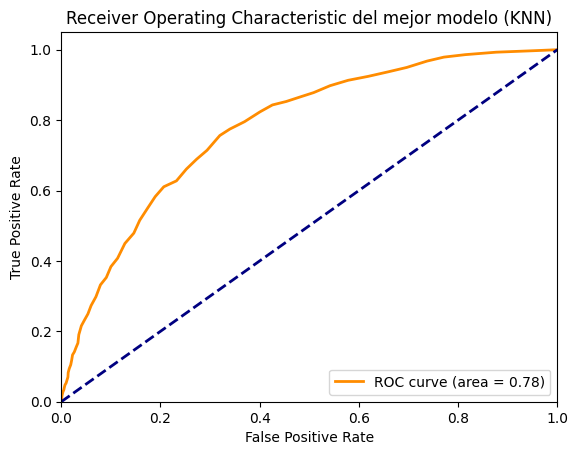

Mejor umbral: 0.16822429906542055

Matriz de confusión del mejor modelo:
[[2737 1139]
 [ 204  510]]


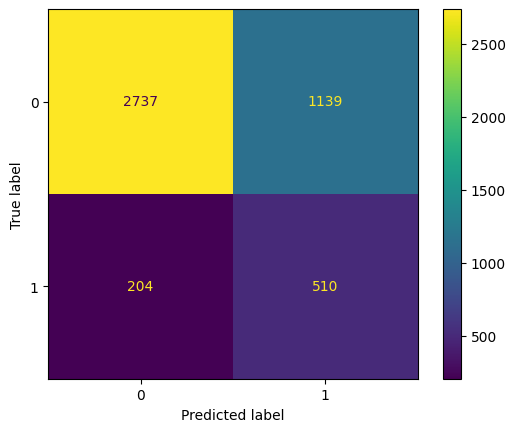


DTC
Fold 1 - Error en validación: 0.22712418300653592, Error en test: 0.24226579520697167
Fold 2 - Error en validación: 0.25108932461873634, Error en test: 0.24466230936819167
Fold 3 - Error en validación: 0.2450980392156863, Error en test: 0.23093681917211328
Fold 4 - Error en validación: 0.30718954248366015, Error en test: 0.30000000000000004
Fold 5 - Error en validación: 0.20479302832244006, Error en test: 0.19956427015250544
Fold 6 - Error en validación: 0.22984749455337694, Error en test: 0.22483660130718952
Fold 7 - Error en validación: 0.2031590413943355, Error en test: 0.20196078431372544
Fold 8 - Error en validación: 0.2129629629629629, Error en test: 0.2263616557734205
Fold 9 - Error en validación: 0.2959128065395096, Error en test: 0.28148148148148144
Fold 10 - Error en validación: 0.21471389645776562, Error en test: 0.22549019607843135
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.14074074074074075


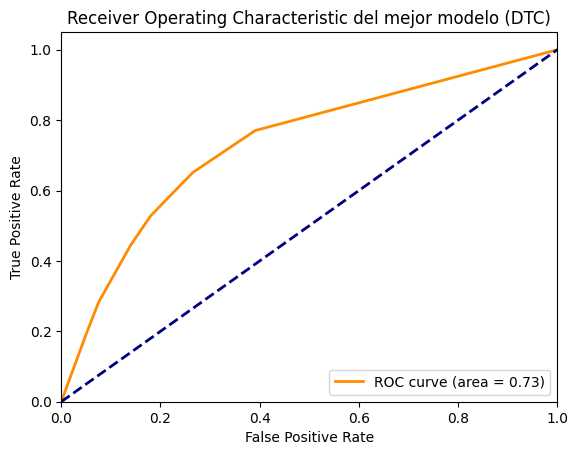

Mejor umbral: 0.14074074074074075

Matriz de confusión del mejor modelo:
[[2848 1028]
 [ 249  465]]


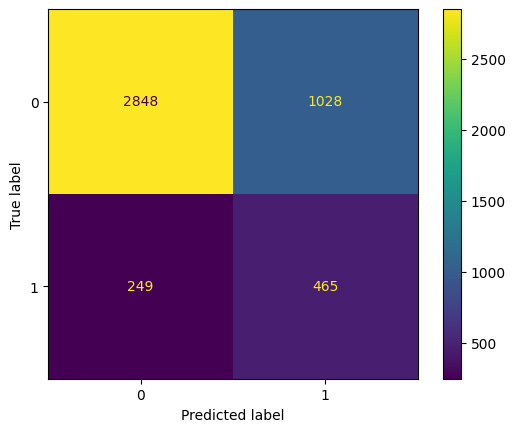

In [454]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # todas las columnas excepto 'alive_yes'
y = df_predict['Diabetes_binary']  # la columna 'alive_yes'

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=10)

# Crear los objetos de los modelos
gbc = gb_random.best_estimator_
rfc = rf_classifier
knn = mejor_modelo_knn
dtc = dtc_random.best_estimator_
models = [gbc,rfc,knn,dtc]
model_names = ['GBC','RFC','KNN','DTC']

# Diccionario para almacenar la información de cada modelo
model_info = {}

for model, name in zip(models, model_names):
    print(f"\n{name}")

    best_model = None
    best_threshold = None
    best_accuracy = 0
    # Listas para almacenar los errores de validación y de prueba
    val_errors = []
    test_errors = []

    # Para cada división de entrenamiento y validación en la validación cruzada
    for i, (train, val) in enumerate(cv.split(X_train, y_train)):
        # Ajustar el modelo a los datos de entrenamiento y predecir las probabilidades para los datos de validación
        model.fit(X_train.iloc[train], y_train.iloc[train])
        probas_ = model.predict_proba(X_train.iloc[val])

        # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

        # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
        distances = ((1 - tpr)**2 + fpr**2)**0.5
        threshold = thresholds[np.argmin(distances)]

        # Generar las predicciones de clase usando el mejor umbral
        y_pred = (probas_[:, 1] > threshold).astype(int)

        # Calcular el error en el conjunto de validación y almacenarlo en la lista
        val_errors.append(1 - accuracy_score(y_train.iloc[val], y_pred))

        # Calcular el error en el conjunto de prueba y almacenarlo en la lista
        probas_test = model.predict_proba(X_test)
        y_pred_test = (probas_test[:, 1] > threshold).astype(int)
        test_errors.append(1 - accuracy_score(y_test, y_pred_test))

        print(f'Fold {i+1} - Error en validación: {val_errors[-1]}, Error en test: {test_errors[-1]}')

        # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_model = model
            best_threshold = threshold

    print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic del mejor modelo ({name})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Mejor umbral: {best_threshold}")
    print("")

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear el objeto ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print("Matriz de confusión del mejor modelo:")
    print(cm)

    # Generar el plot
    disp.plot()
    plt.show()

    # Guardar la información de este modelo en el diccionario
    model_info[name] = {
        'val_errors': val_errors,
        'test_errors': test_errors,
        'best_model': best_model,
        'best_threshold': best_threshold
    }

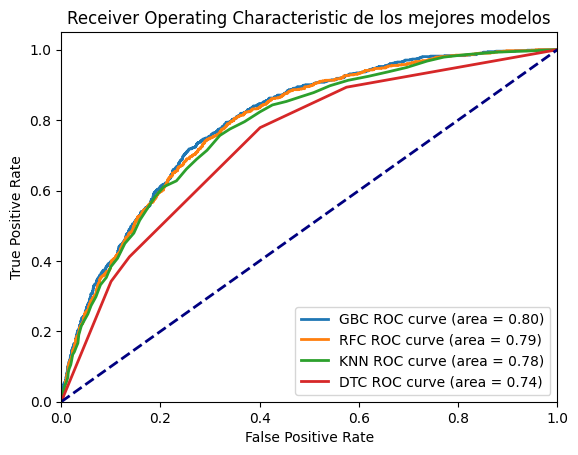

In [449]:
plt.figure()

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener el mejor modelo y el mejor umbral
    best_model = model_data['best_model']
    best_threshold = model_data['best_threshold']

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Añadir la línea de azar
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustar los límites y etiquetas de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Añadir título y leyenda
plt.title('Receiver Operating Characteristic de los mejores modelos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

In [450]:
from scipy.stats import shapiro

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener los errores de prueba
    test_errors = model_data['test_errors']

    # Aplicar el test de Shapiro-Wilk
    stat, p = shapiro(test_errors)

    print(f"\n{model_name}")
    print(f'Statistics={stat:.3f}, p={p:.3f}')

    # Interpretar
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


GBC
Statistics=0.953, p=0.702
Sample looks Gaussian (fail to reject H0)

RFC
Statistics=0.953, p=0.703
Sample looks Gaussian (fail to reject H0)

KNN
Statistics=0.930, p=0.449
Sample looks Gaussian (fail to reject H0)

DTC
Statistics=0.815, p=0.022
Sample does not look Gaussian (reject H0)


In [451]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Model', 'Average Accuracy', 'Best Accuracy'])

# Calcular el promedio y el mejor accuracy en el conjunto de prueba para cada modelo
for model_name, model_data in model_info.items():
    test_errors = model_data['test_errors']
    average_accuracy = 1 - sum(test_errors) / len(test_errors)  # Calcular el promedio de la precisión
    best_accuracy = 1 - min(test_errors)  # Obtener el mejor accuracy

    results_df = results_df.append({'Model': model_name, 'Average Accuracy': average_accuracy, 'Best Accuracy': best_accuracy}, ignore_index=True)

# Mostrar la tabla de resultados
print(results_df)

  Model  Average Accuracy  Best Accuracy
0   GBC          0.714357       0.735948
1   RFC          0.713399       0.736166
2   KNN          0.720196       0.736601
3   DTC          0.754619       0.792375


C:\Users\nicot\AppData\Local\Temp\ipykernel_3296\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_3296\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_3296\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_3296\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [452]:
from scipy.stats import f_oneway

# Extraer los errores de prueba de cada modelo
gbc_errors = model_info['GBC']['test_errors']
knn_errors = model_info['KNN']['test_errors']
rfc_errors = model_info['RFC']['test_errors']
dtc_errors = model_info['DTC']['test_errors']
# Realizar el ANOVA
stat, p = f_oneway(gbc_errors, knn_errors, rfc_errors,dtc_errors)

print('ANOVA')
print(f'Statistics={stat:.3f}, p={p:.3f}')

# Interpretar
alpha = 0.05
if p > alpha:
    print('Las medias parecen ser iguales (fail to reject H0)')
else:
    print('Las medias parecen ser diferentes (reject H0)')

ANOVA
Statistics=8.228, p=0.000
Las medias parecen ser diferentes (reject H0)


# xgboost


Fold 1 - Accuracy en validación: 0.6949891067538126, Accuracy en test: 0.7006535947712418
Fold 2 - Accuracy en validación: 0.7156862745098039, Accuracy en test: 0.7233115468409586
Fold 3 - Accuracy en validación: 0.7091503267973857, Accuracy en test: 0.7076252723311547
Fold 4 - Accuracy en validación: 0.6928104575163399, Accuracy en test: 0.6923747276688453
Fold 5 - Accuracy en validación: 0.7156862745098039, Accuracy en test: 0.7372549019607844
Fold 6 - Accuracy en validación: 0.7135076252723311, Accuracy en test: 0.730718954248366
Fold 7 - Accuracy en validación: 0.7080610021786492, Accuracy en test: 0.7111111111111111
Fold 8 - Accuracy en validación: 0.6710239651416122, Accuracy en test: 0.7041394335511982
Fold 9 - Accuracy en validación: 0.6938997821350763, Accuracy en test: 0.7167755991285403
Fold 10 - Accuracy en validación: 0.7491821155943293, Accuracy en test: 0.7525054466230937
Mejor modelo - Accuracy en test: 0.7525054466230937, Umbral: 0.19181783497333527


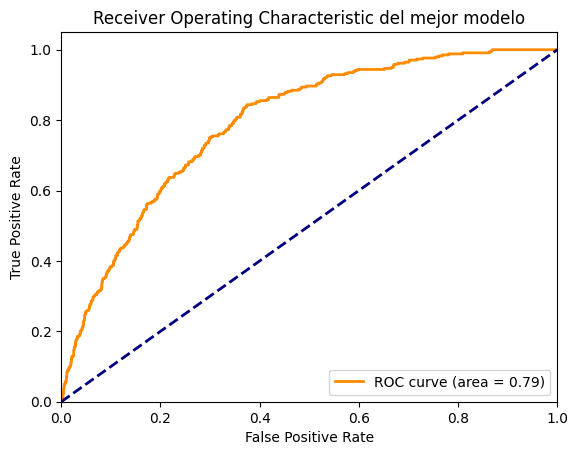

Mejor umbral: 0.19181783497333527

Matriz de confusión del mejor modelo:
[[1508  448]
 [ 120  219]]


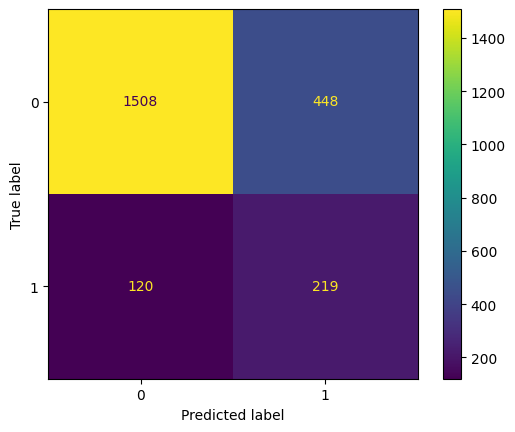

In [226]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='binary:logistic',  # 'binary:logistic' for binary classification
    max_depth=3,  # Maximum tree depth
    learning_rate=0.1,  # Step size shrinkage for boosting
    n_estimators=100,  # Number of boosting rounds
    eval_metric='logloss'  # Evaluation metric to use
)

X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# training/test

# Crear el objeto KNeighborsClassifier
cv = StratifiedKFold(n_splits=10)

best_model = None
best_threshold = None
best_accuracy = 0

# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    # Ajustar kNN a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    model.fit(X_train.iloc[train], y_train.iloc[train])
    probas_ = model.predict_proba(X_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])
    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = model.predict_proba(X_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(X_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}\n")
# print("")
# print("----------------------------------------------------------------------------")
# print("----------------------------------------------------------------------------")
# print("----------------------------------------------------------------------------")
# print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# resto


LDA
Fold 1 - Error en validación: 0.29493464052287577, Error en test: 0.29520697167755994
Fold 2 - Error en validación: 0.30228758169934644, Error en test: 0.2845315904139434
Fold 3 - Error en validación: 0.2799564270152506, Error en test: 0.28583877995642704
Fold 4 - Error en validación: 0.27240533914464726, Error en test: 0.274074074074074
Fold 5 - Error en validación: 0.2824843366929992, Error en test: 0.2734204793028322
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.1399942711932291


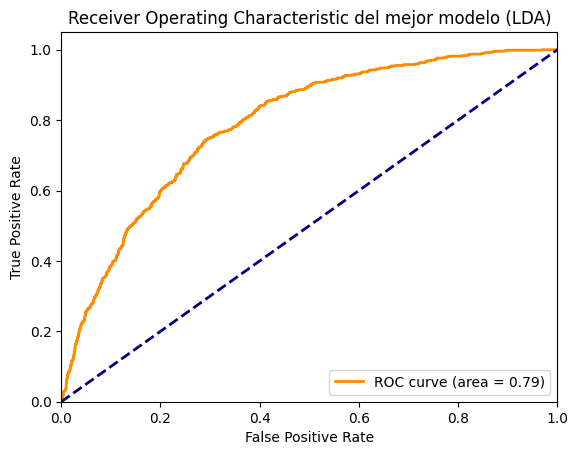

Mejor umbral: 0.1399942711932291

Matriz de confusión del mejor modelo:
[[2672 1204]
 [ 172  542]]


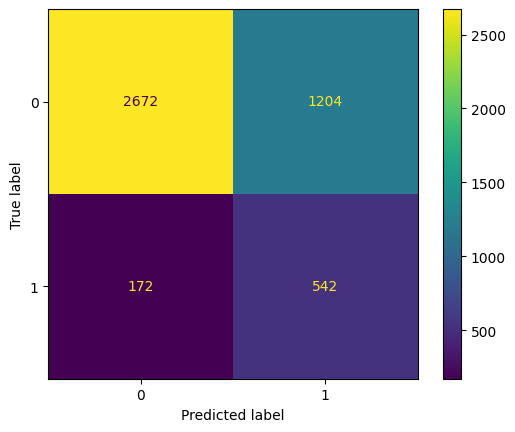


KNN
Fold 1 - Error en validación: 0.2350217864923747, Error en test: 0.226797385620915
Fold 2 - Error en validación: 0.23828976034858385, Error en test: 0.22505446623093683
Fold 3 - Error en validación: 0.22848583877995643, Error en test: 0.2220043572984749
Fold 4 - Error en validación: 0.21656224461999452, Error en test: 0.2289760348583878
Fold 5 - Error en validación: 0.2277308635249251, Error en test: 0.22265795206971672
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.2


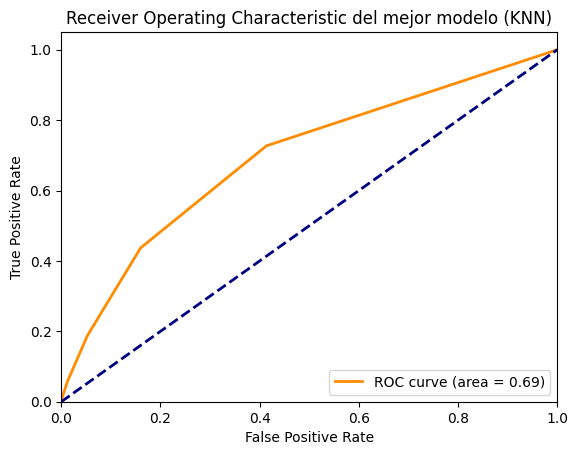

Mejor umbral: 0.2

Matriz de confusión del mejor modelo:
[[3256  620]
 [ 402  312]]


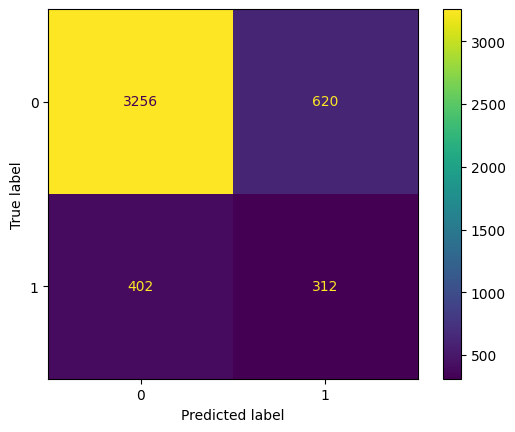


GNB
Fold 1 - Error en validación: 0.2883986928104575, Error en test: 0.30980392156862746
Fold 2 - Error en validación: 0.3104575163398693, Error en test: 0.2991285403050109
Fold 3 - Error en validación: 0.3139978213507625, Error en test: 0.31394335511982574
Fold 4 - Error en validación: 0.2969218196676655, Error en test: 0.29738562091503273
Fold 5 - Error en validación: 0.3176246254426587, Error en test: 0.3178649237472767
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.18727039174183027


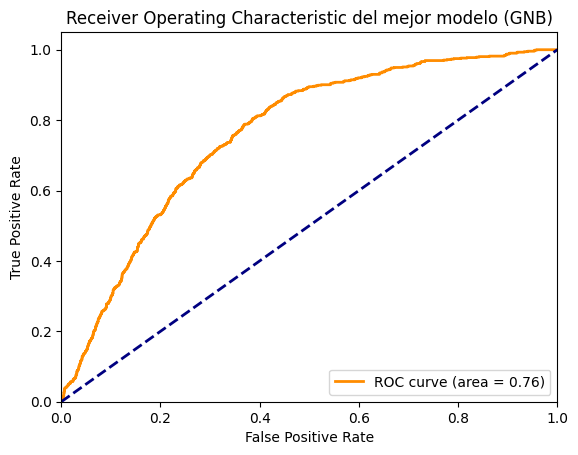

Mejor umbral: 0.18727039174183027

Matriz de confusión del mejor modelo:
[[2664 1212]
 [ 204  510]]


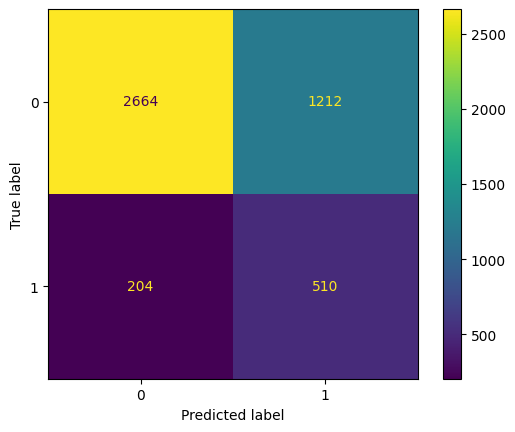


DTC
Fold 1 - Error en validación: 0.2252178649237473, Error en test: 0.23246187363834425
Fold 2 - Error en validación: 0.15223311546840956, Error en test: 0.15555555555555556
Fold 3 - Error en validación: 0.24346405228758172, Error en test: 0.23899782135076253
Fold 4 - Error en validación: 0.23508580768183052, Error en test: 0.22766884531590414
Fold 5 - Error en validación: 0.22936529555979301, Error en test: 0.2381263616557734
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.5


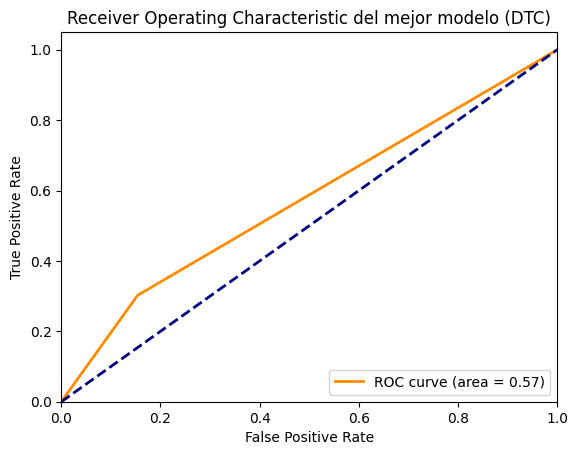

Mejor umbral: 0.5

Matriz de confusión del mejor modelo:
[[3282  594]
 [ 499  215]]


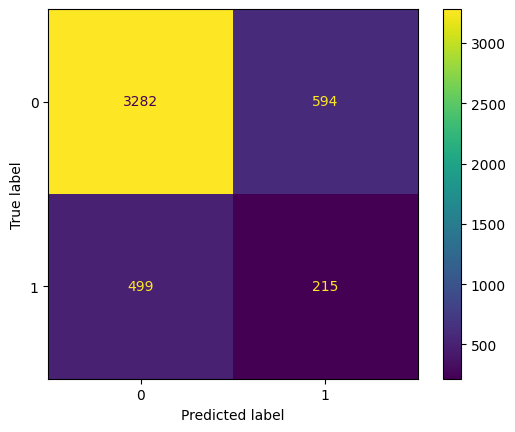


RFC
Fold 1 - Error en validación: 0.335239651416122, Error en test: 0.3363834422657952
Fold 2 - Error en validación: 0.3126361655773421, Error en test: 0.2949891067538126
Fold 3 - Error en validación: 0.3052832244008714, Error en test: 0.29738562091503273
Fold 4 - Error en validación: 0.31898665213838195, Error en test: 0.31154684095860563
Fold 5 - Error en validación: 0.3042767638245709, Error en test: 0.30217864923747273
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.14333333333333334


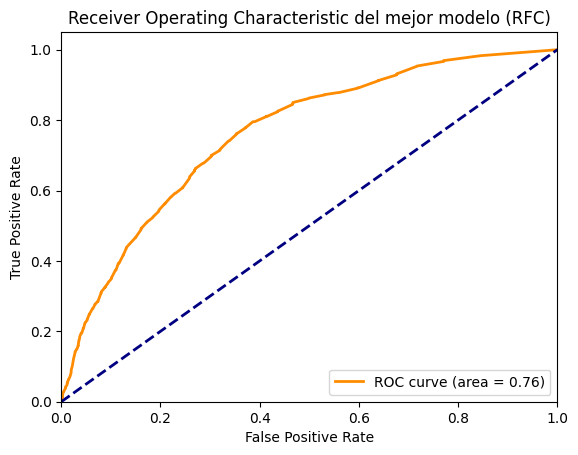

Mejor umbral: 0.14333333333333334

Matriz de confusión del mejor modelo:
[[2505 1371]
 [ 170  544]]


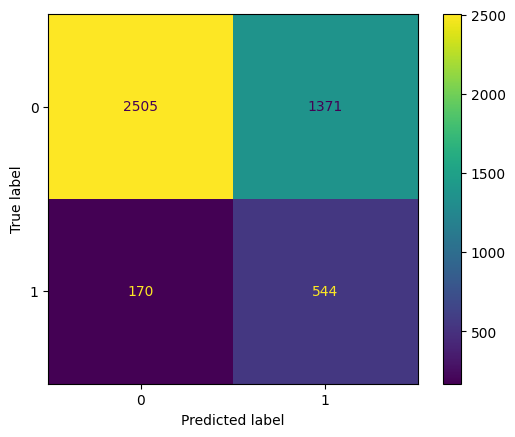


GBC
Fold 1 - Error en validación: 0.29030501089324623, Error en test: 0.2993464052287582
Fold 2 - Error en validación: 0.3126361655773421, Error en test: 0.29825708061002176
Fold 3 - Error en validación: 0.2883986928104575, Error en test: 0.2901960784313725
Fold 4 - Error en validación: 0.30781803323345136, Error en test: 0.3067538126361655
Fold 5 - Error en validación: 0.32470716426041946, Error en test: 0.3108932461873638
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.14908939067887575


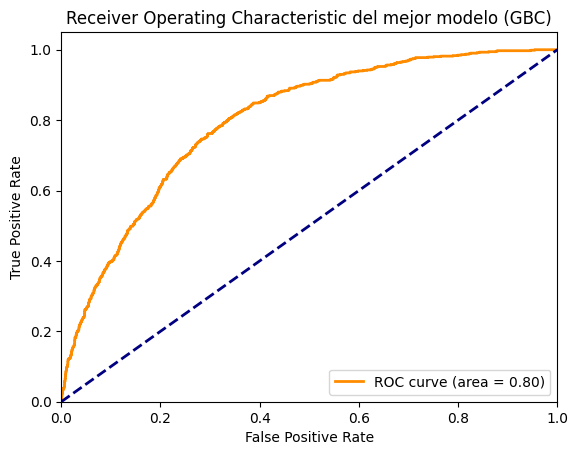

Mejor umbral: 0.14908939067887575

Matriz de confusión del mejor modelo:
[[2676 1200]
 [ 163  551]]


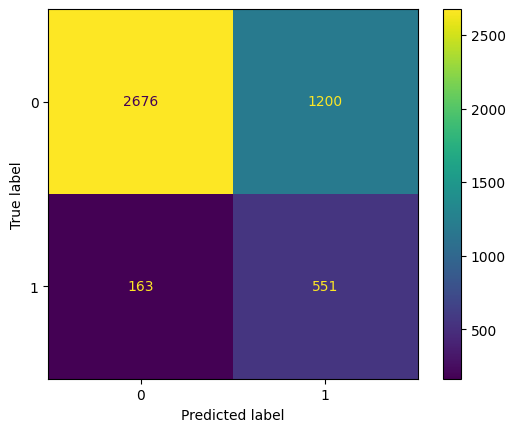

In [453]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear la matriz de características y la variable objetivo
# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # todas excepto target
y = df_predict['Diabetes_binary']  # target

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=5)

# Crear los objetos de los modelos
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=5,  )
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42,)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier()


models = [lda, knn, gnb, dtc, rf_classifier, gb_classifier]
model_names = ['LDA', 'KNN', 'GNB', 'DTC', 'RFC', 'GBC']

# Diccionario para almacenar la información de cada modelo
model_info = {}

for model, name in zip(models, model_names):
    print(f"\n{name}")

    best_model = None
    best_threshold = None
    best_accuracy = 0
    # Listas para almacenar los errores de validación y de prueba
    val_errors = []
    test_errors = []

    # Para cada división de entrenamiento y validación en la validación cruzada
    for i, (train, val) in enumerate(cv.split(X_train, y_train)):
        # Ajustar el modelo a los datos de entrenamiento y predecir las probabilidades para los datos de validación
        model.fit(X_train.iloc[train], y_train.iloc[train])
        probas_ = model.predict_proba(X_train.iloc[val])

        # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

        # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
        distances = ((1 - tpr)**2 + fpr**2)**0.5
        threshold = thresholds[np.argmin(distances)]

        # Generar las predicciones de clase usando el mejor umbral
        y_pred = (probas_[:, 1] > threshold).astype(int)

        # Calcular el error en el conjunto de validación y almacenarlo en la lista
        val_errors.append(1 - accuracy_score(y_train.iloc[val], y_pred))

        # Calcular el error en el conjunto de prueba y almacenarlo en la lista
        probas_test = model.predict_proba(X_test)
        y_pred_test = (probas_test[:, 1] > threshold).astype(int)
        test_errors.append(1 - accuracy_score(y_test, y_pred_test))

        print(f'Fold {i+1} - Error en validación: {val_errors[-1]}, Error en test: {test_errors[-1]}')

        # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_model = model
            best_threshold = threshold

    print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic del mejor modelo ({name})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Mejor umbral: {best_threshold}")
    print("")

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear el objeto ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print("Matriz de confusión del mejor modelo:")
    print(cm)

    # Generar el plot
    disp.plot()
    plt.show()

    # Guardar la información de este modelo en el diccionario
    model_info[name] = {
        'val_errors': val_errors,
        'test_errors': test_errors,
        'best_model': best_model,
        'best_threshold': best_threshold
    }


In [33]:
from scipy.stats import shapiro

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener los errores de prueba
    test_errors = model_data['test_errors']

    # Aplicar el test de Shapiro-Wilk
    stat, p = shapiro(test_errors)

    print(f"\n{model_name}")
    print(f'Statistics={stat:.3f}, p={p:.3f}')

    # Interpretar
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



LDA
Statistics=0.964, p=0.838
Sample looks Gaussian (fail to reject H0)

KNN
Statistics=0.910, p=0.468
Sample looks Gaussian (fail to reject H0)

GNB
Statistics=0.921, p=0.538
Sample looks Gaussian (fail to reject H0)

DTC
Statistics=0.940, p=0.668
Sample looks Gaussian (fail to reject H0)

RFC
Statistics=0.919, p=0.524
Sample looks Gaussian (fail to reject H0)

GBC
Statistics=0.784, p=0.060
Sample looks Gaussian (fail to reject H0)


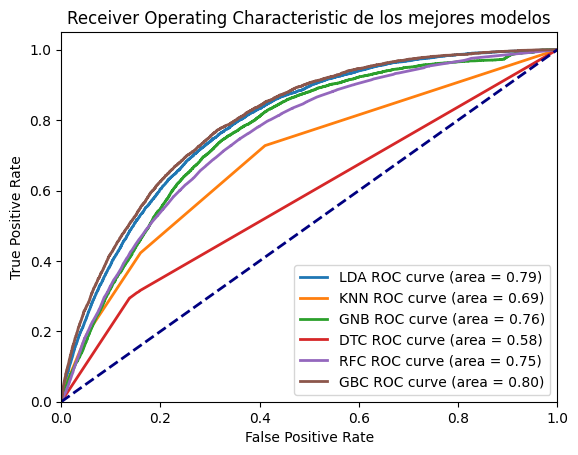

In [34]:
plt.figure()


# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener el mejor modelo y el mejor umbral
    best_model = model_data['best_model']
    best_threshold = model_data['best_threshold']

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Añadir la línea de azar
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustar los límites y etiquetas de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Añadir título y leyenda
plt.title('Receiver Operating Characteristic de los mejores modelos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()


In [35]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Model', 'Average Accuracy', 'Best Accuracy'])

# Calcular el promedio y el mejor accuracy en el conjunto de prueba para cada modelo
for model_name, model_data in model_info.items():
    test_errors = model_data['test_errors']
    average_accuracy = 1 - sum(test_errors) / len(test_errors)  # Calcular el promedio de la precisión
    best_accuracy = 1 - min(test_errors)  # Obtener el mejor accuracy

    results_df = results_df.append({'Model': model_name, 'Average Accuracy': average_accuracy, 'Best Accuracy': best_accuracy}, ignore_index=True)

# Mostrar la tabla de resultados
print(results_df)

  Model  Average Accuracy  Best Accuracy
0   LDA          0.705981       0.711428
1   KNN          0.775714       0.777536
2   GNB          0.692193       0.703606
3   DTC          0.759926       0.763308
4   RFC          0.683482       0.691535
5   GBC          0.720214       0.723848


C:\Users\nicot\AppData\Local\Temp\ipykernel_2092\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_2092\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_2092\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_2092\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\nicot\AppData\Local\Temp\ipykernel_2092\3589698907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# knn prueba


In [38]:
df_diabetes = data[data['Diabetes_binary'] ==  1]

df_no_diabetes = data[data['Diabetes_binary'] == 0] 

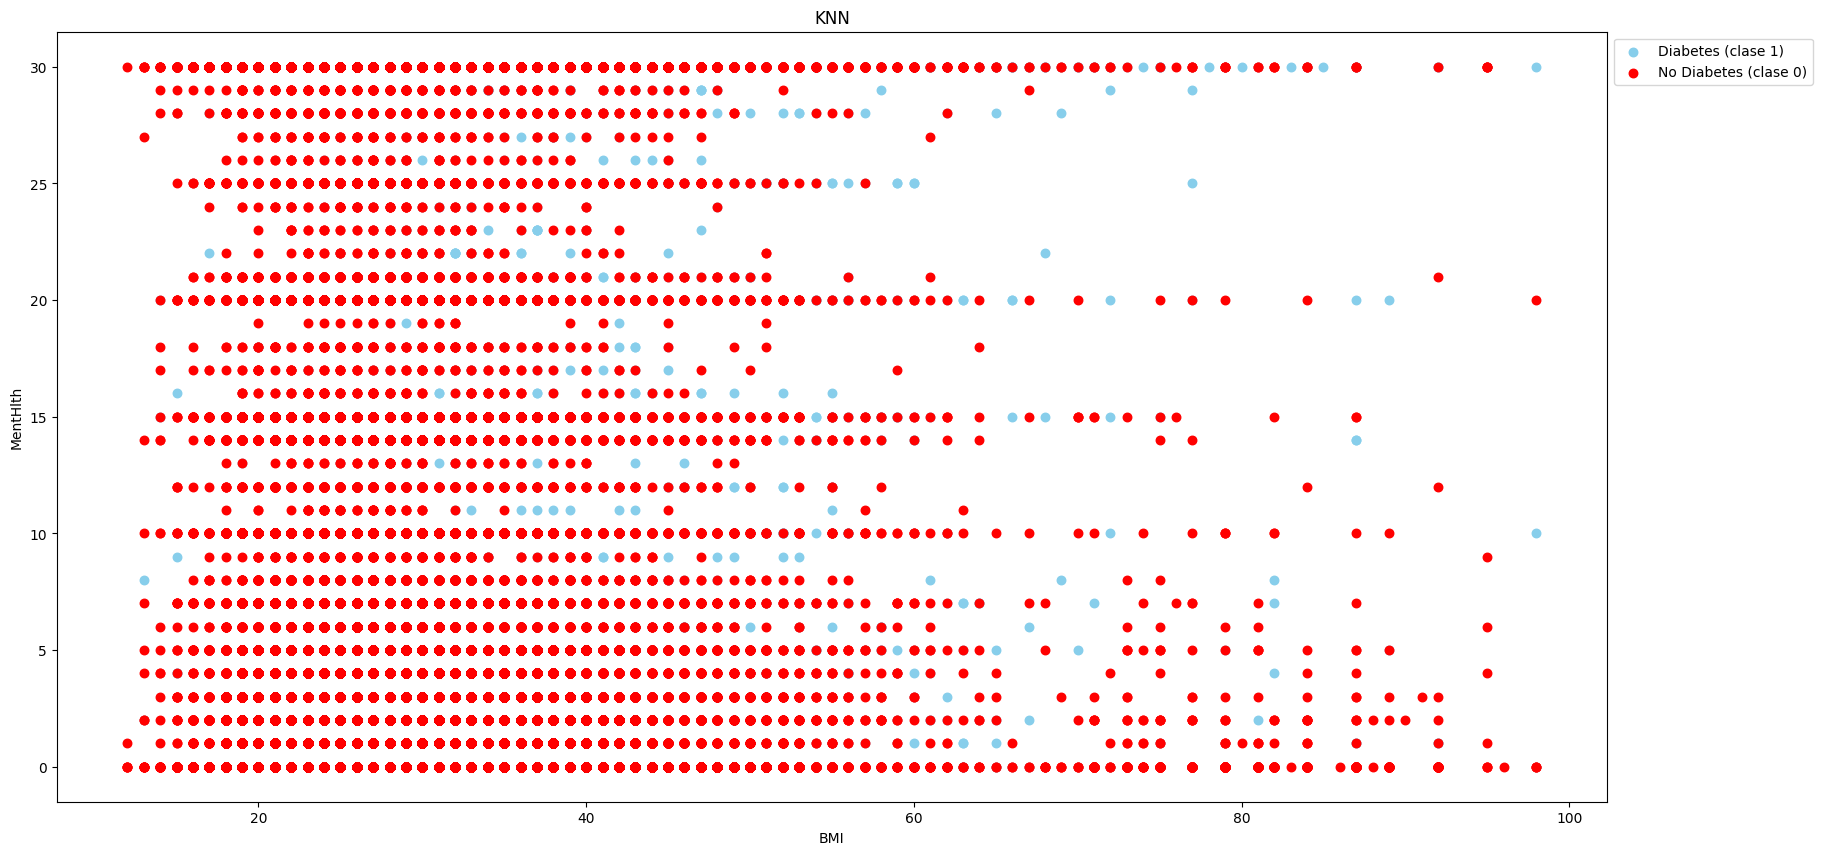

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(df_diabetes["BMI"], df_diabetes["PhysHlth"],
            marker=".", s=150, color="skyblue",
            label="Diabetes (clase 1)")

plt.scatter(df_no_diabetes["BMI"], df_no_diabetes["PhysHlth"],
            marker=".", s=150, color="red", 
            label="No Diabetes (clase 0)")

plt.ylabel("MentHlth")
plt.xlabel("BMI")
plt.title('KNN')
plt.legend(bbox_to_anchor=(1, 1)) 
plt.show()

In [55]:

print(data.shape)

print(253680**0.5)

(253680, 22)
503.66655636442647


In [64]:
#KNN 
#clase : diabetes
#datos : PhysHlth y BMI, al ser variables numéricas

datos = data[['PhysHlth', 'BMI']]
clase = data['Diabetes_binary']

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)

clasificador = KNeighborsClassifier(n_neighbors=503)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=503)

BMI: 24
phys: 24
Clase: [0.]
Probabilidades por clase [[0.82902584 0.17097416]]


c:\Users\nicot\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names


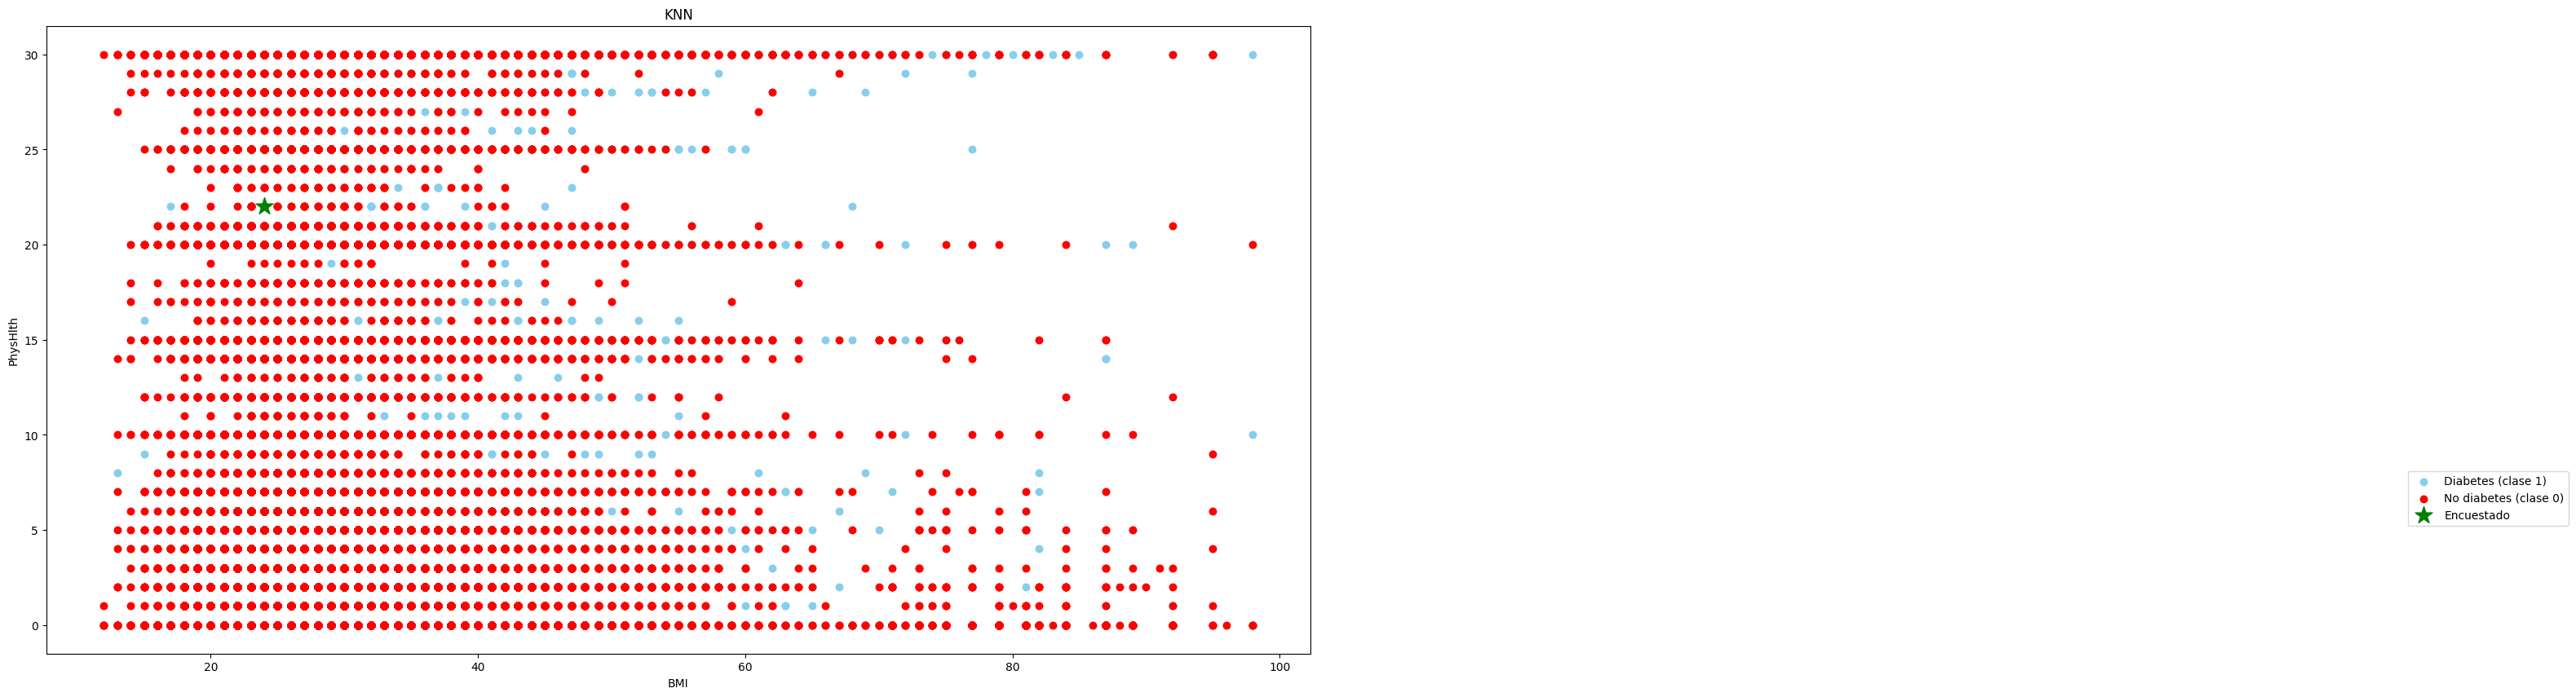

In [65]:
bmi = int(input('Inrese su IMC'))
print('BMI:',bmi)
phys = int(input('Inrese días de pobre salud física'))
print('phys:',bmi)
#Escalar los datos del nuevo encuestado

encuestado = escalador.transform([[bmi, phys]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(encuestado))
print("Probabilidades por clase",
      clasificador.predict_proba(encuestado))

plt.figure(figsize=(20,10))
#Código para graficar
plt.scatter(df_diabetes["BMI"], df_diabetes["PhysHlth"],
            marker=".", s=150, color="skyblue",
            label="Diabetes (clase 1)")

plt.scatter(df_no_diabetes["BMI"], df_no_diabetes["PhysHlth"],
            marker=".", s=150, color="red", 
            label="No diabetes (clase 0)")

plt.scatter(bmi, phys, marker="*", s=250, color="green", label="Encuestado") 
plt.ylabel("PhysHlth")
plt.xlabel("BMI")
plt.title('KNN')
plt.legend(bbox_to_anchor=(2, 0.3))
plt.show()

# resto

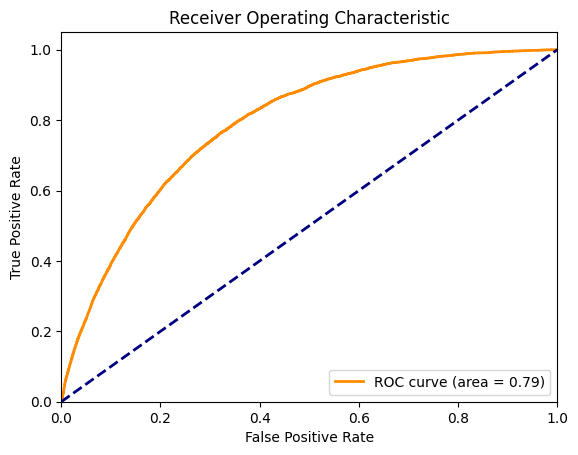

Mejor umbral: 0.14848829744458114

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------



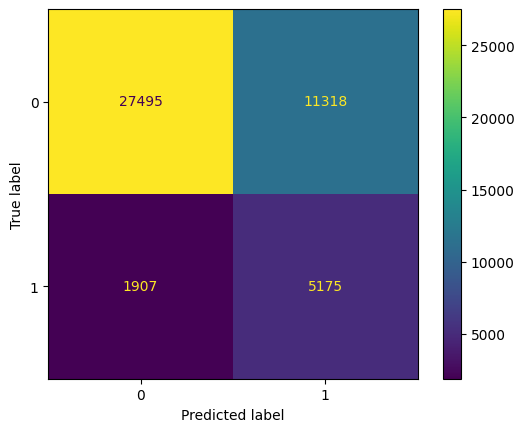

Accuracy en test: 0.7118422486109598


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import numpy as np

# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # not target
y = df_predict['Diabetes_binary']  # target

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
# El conjunto de entrenamiento se utilizará para ajustar el modelo y el conjunto de prueba para evaluar su rendimiento.
# Establecemos el tamaño del conjunto de prueba en el 20% de los datos totales. (regla 60-20-20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

# Luego, ajustamos el modelo LDA en el conjunto de entrenamiento.
lda.fit(X_train, y_train)

# Una vez que el modelo está ajustado, podemos usarlo para predecir las probabilidades de supervivencia para el conjunto de prueba.
probas_ = lda.predict_proba(X_test)

# Con estas probabilidades, calculamos la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR), y los umbrales de clasificación.
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
distances = ((1 - tpr)**2 + fpr**2)**0.5


# Luego, seleccionamos el umbral que corresponde al punto más cercano al punto ideal en la curva ROC.
best_threshold = thresholds[np.argmin(distances)]

print(f"Mejor umbral: {best_threshold}")

# Ahora que tenemos el mejor umbral, podemos usarlo para convertir las probabilidades de supervivencia en predicciones de clase.
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=lda.classes_)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)


print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")
# Generar el plot
disp.plot()


# Mostrar el plot
plt.show()

# Calcular la precisión en el conjunto de prueba
probas_test = lda.predict_proba(X_test)
y_pred_test = (probas_test[:, 1] > best_threshold).astype(int)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy en test: {accuracy_test}')

Fold 1 - Accuracy en validación: 0.698932345571413, Accuracy en test: 0.7009913933979737
Fold 2 - Accuracy en validación: 0.7062316156444057, Accuracy en test: 0.7074844754330537
Fold 3 - Accuracy en validación: 0.7063950321385772, Accuracy en test: 0.7069833315175945
Fold 4 - Accuracy en validación: 0.7060137269855105, Accuracy en test: 0.7114282601590587
Fold 5 - Accuracy en validación: 0.7011030913795452, Accuracy en test: 0.7030177579257
Mejor modelo - Accuracy en test: 0.7114282601590587, Umbral: 0.14850560041527103


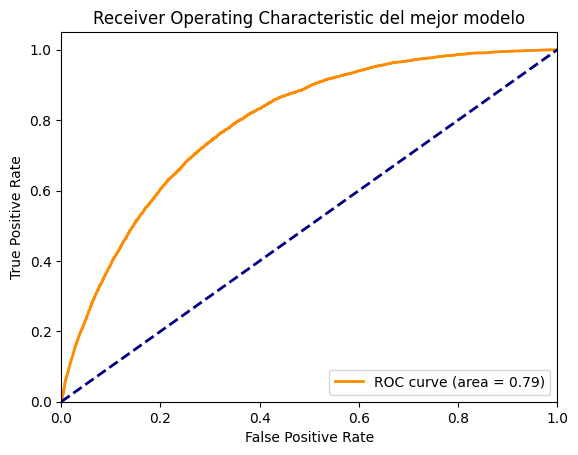

Mejor umbral: 0.14850560041527103

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[27477 11336]
 [ 1914  5168]]


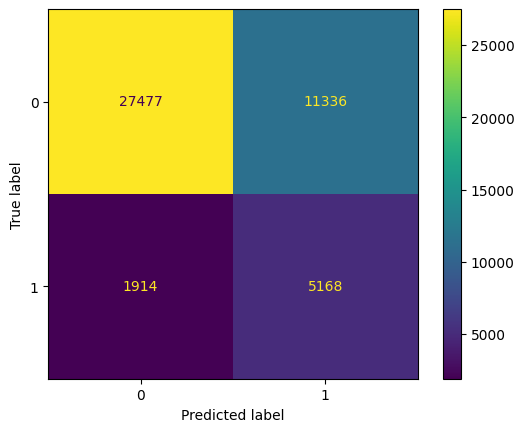

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # todas las columnas excepto 'alive_yes'
y = df_predict['Diabetes_binary']  # la columna 'alive_yes'

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=5)

# Crear el objeto Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

best_model = None
best_threshold = None
best_accuracy = 0

# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    # Ajustar LDA a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    lda.fit(X_train.iloc[train], y_train.iloc[train])
    probas_ = lda.predict_proba(X_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = lda.predict_proba(X_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = lda
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(X_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)


# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()


Fold 1 - Accuracy en validación: 0.6900533827214294, Accuracy en test: 0.6938010676544286
Fold 2 - Accuracy en validación: 0.6912517703453536, Accuracy en test: 0.6934960235319751
Fold 3 - Accuracy en validación: 0.6982242074300032, Accuracy en test: 0.7036060573047173
Fold 4 - Accuracy en validación: 0.6798126157533501, Accuracy en test: 0.685891709336529
Fold 5 - Accuracy en validación: 0.6787688955467792, Accuracy en test: 0.6841703889312561
Mejor modelo - Accuracy en test: 0.7036060573047173, Umbral: 0.2320274755297786


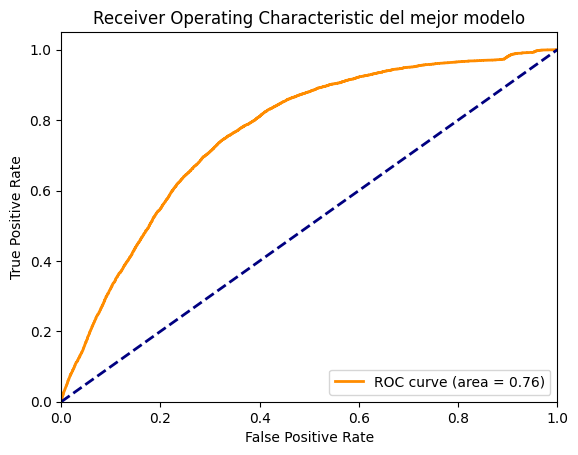

Mejor umbral: 0.2320274755297786

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[27133 11680]
 [ 2039  5043]]


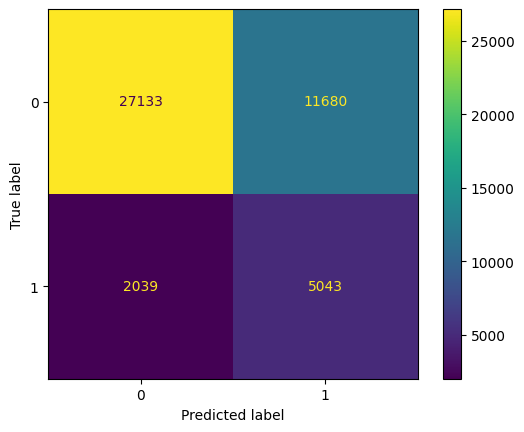

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

X = df_predict.drop('Diabetes_binary', axis=1)  # todas las columnas excepto 'alive_yes'
y = df_predict['Diabetes_binary']  # la columna 'alive_yes'

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=5)

# Crear el objeto GaussianNB
gnb = GaussianNB()

best_model = None
best_threshold = None
best_accuracy = 0

# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    gnb.fit(X_train.iloc[train], y_train.iloc[train])
    probas_ = gnb.predict_proba(X_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = gnb.predict_proba(X_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = gnb
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(X_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

Fold 1 - Accuracy en validación: 0.7584976576969169, Accuracy en test: 0.7554417692559102
Fold 2 - Accuracy en validación: 0.7592057958383266, Accuracy en test: 0.759864909031485
Fold 3 - Accuracy en validación: 0.7594509205795839, Accuracy en test: 0.7582307440897701
Fold 4 - Accuracy en validación: 0.7592602680030505, Accuracy en test: 0.7618041180956531
Fold 5 - Accuracy en validación: 0.7625221299196514, Accuracy en test: 0.7615208628390893
Mejor modelo - Accuracy en test: 0.7618041180956531, Umbral: 0.16666666666666666


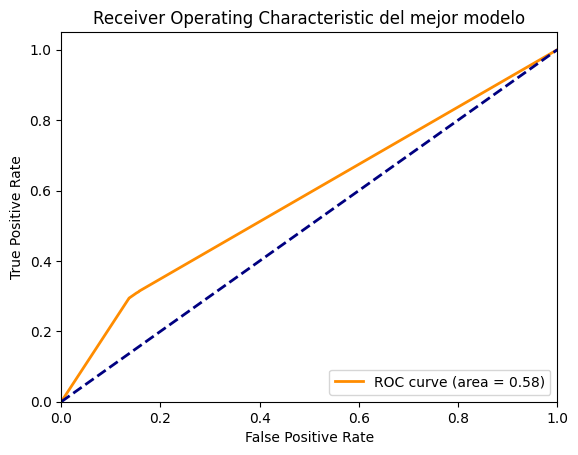

Mejor umbral: 0.16666666666666666

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[32727  6086]
 [ 4859  2223]]


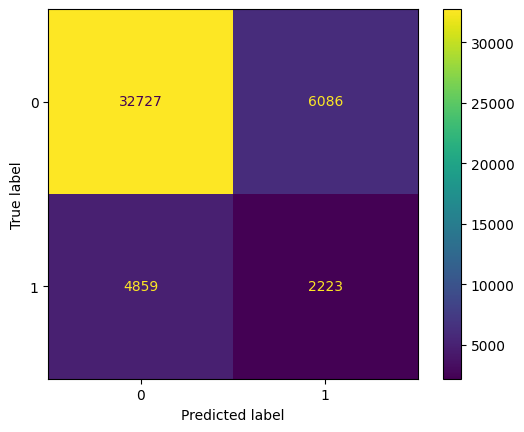

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # todas las columnas excepto 'alive_yes'
y = df_predict['Diabetes_binary']  # la columna 'alive_yes'

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=5)

# Crear el objeto DecisionTreeClassifier
dtc = DecisionTreeClassifier()

best_model = None
best_threshold = None
best_accuracy = 0

# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    # Ajustar DecisionTreeClassifier a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    dtc.fit(X_train.iloc[train], y_train.iloc[train])
    probas_ = dtc.predict_proba(X_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = dtc.predict_proba(X_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = dtc
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(X_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()


LDA
Fold 1 - Error en validación: 0.29493464052287577, Error en test: 0.29520697167755994
Fold 2 - Error en validación: 0.30228758169934644, Error en test: 0.2845315904139434
Fold 3 - Error en validación: 0.2799564270152506, Error en test: 0.28583877995642704
Fold 4 - Error en validación: 0.27240533914464726, Error en test: 0.274074074074074
Fold 5 - Error en validación: 0.2824843366929992, Error en test: 0.2734204793028322
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.1399942711932291


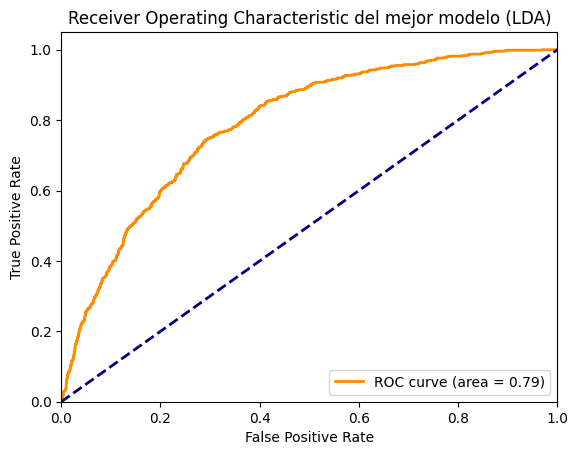

Mejor umbral: 0.1399942711932291

Matriz de confusión del mejor modelo:
[[2672 1204]
 [ 172  542]]


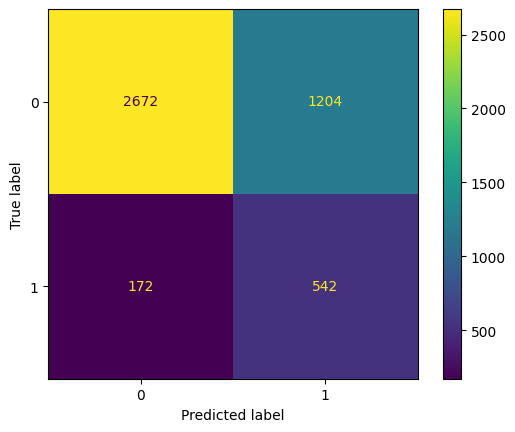


KNN
Fold 1 - Error en validación: 0.2350217864923747, Error en test: 0.226797385620915
Fold 2 - Error en validación: 0.23828976034858385, Error en test: 0.22505446623093683
Fold 3 - Error en validación: 0.22848583877995643, Error en test: 0.2220043572984749
Fold 4 - Error en validación: 0.21656224461999452, Error en test: 0.2289760348583878
Fold 5 - Error en validación: 0.2277308635249251, Error en test: 0.22265795206971672
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.2


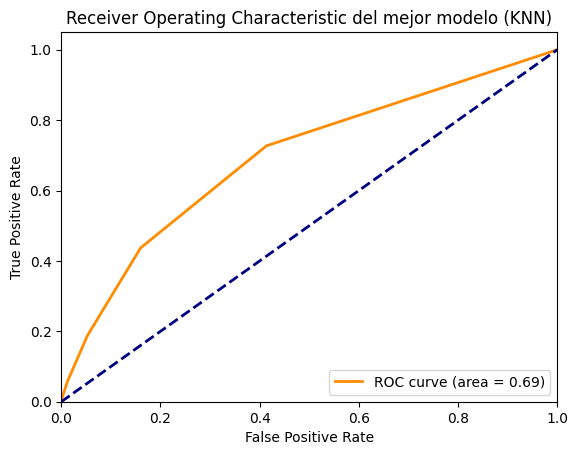

Mejor umbral: 0.2

Matriz de confusión del mejor modelo:
[[3256  620]
 [ 402  312]]


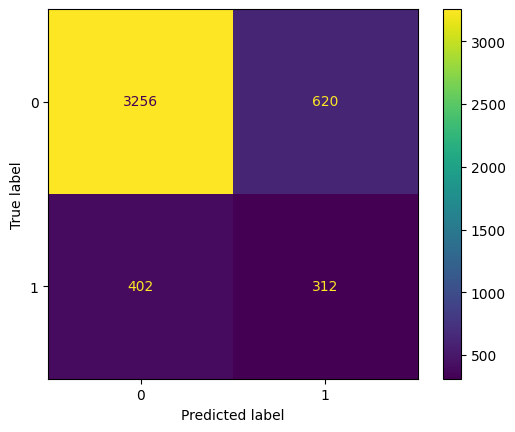


GNB
Fold 1 - Error en validación: 0.2883986928104575, Error en test: 0.30980392156862746
Fold 2 - Error en validación: 0.3104575163398693, Error en test: 0.2991285403050109
Fold 3 - Error en validación: 0.3139978213507625, Error en test: 0.31394335511982574
Fold 4 - Error en validación: 0.2969218196676655, Error en test: 0.29738562091503273
Fold 5 - Error en validación: 0.3176246254426587, Error en test: 0.3178649237472767
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.18727039174183027


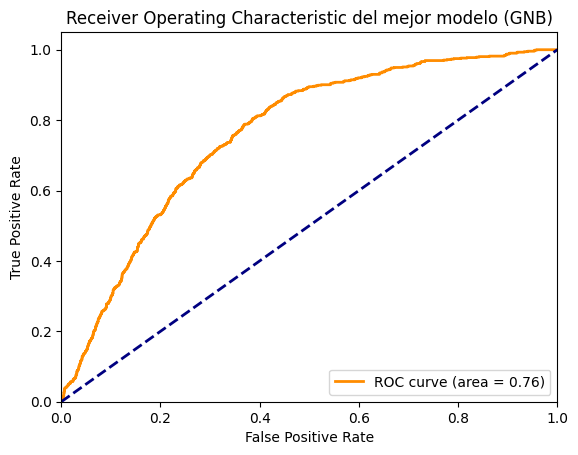

Mejor umbral: 0.18727039174183027

Matriz de confusión del mejor modelo:
[[2664 1212]
 [ 204  510]]


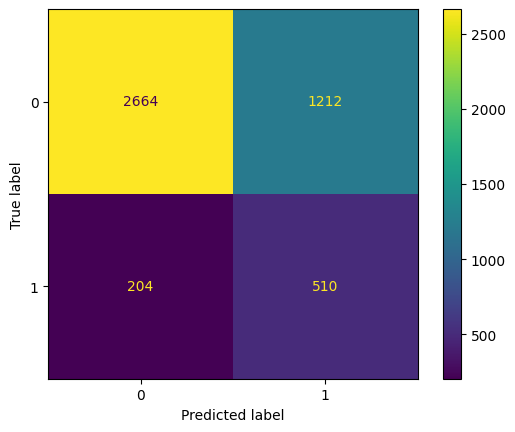


DTC
Fold 1 - Error en validación: 0.2252178649237473, Error en test: 0.23246187363834425
Fold 2 - Error en validación: 0.15223311546840956, Error en test: 0.15555555555555556
Fold 3 - Error en validación: 0.24346405228758172, Error en test: 0.23899782135076253
Fold 4 - Error en validación: 0.23508580768183052, Error en test: 0.22766884531590414
Fold 5 - Error en validación: 0.22936529555979301, Error en test: 0.2381263616557734
Mejor modelo - Accuracy en test: 0.7366013071895425, Umbral: 0.5


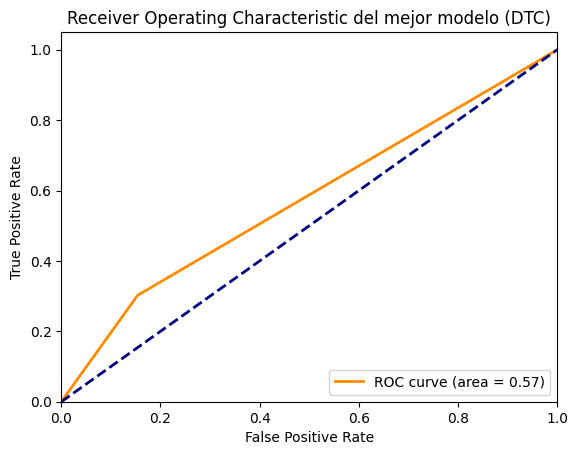

Mejor umbral: 0.5

Matriz de confusión del mejor modelo:
[[3282  594]
 [ 499  215]]


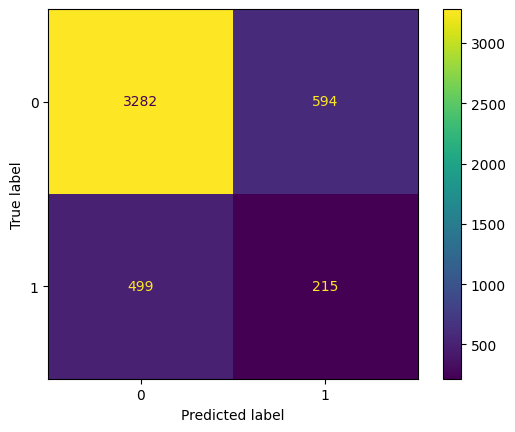

In [455]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de características y la variable objetivo
X = df_predict.drop('Diabetes_binary', axis=1)  # todas las columnas excepto 'alive_yes'
y = df_predict['Diabetes_binary']  # la columna 'alive_yes'

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=5)

# Crear los objetos de los modelos
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)

models = [lda, knn, gnb, dtc]
model_names = ['LDA', 'KNN', 'GNB', 'DTC']

# Diccionario para almacenar la información de cada modelo
model_info = {}

for model, name in zip(models, model_names):
    print(f"\n{name}")

    best_model = None
    best_threshold = None
    best_accuracy = 0
    # Listas para almacenar los errores de validación y de prueba
    val_errors = []
    test_errors = []

    # Para cada división de entrenamiento y validación en la validación cruzada
    for i, (train, val) in enumerate(cv.split(X_train, y_train)):
        # Ajustar el modelo a los datos de entrenamiento y predecir las probabilidades para los datos de validación
        model.fit(X_train.iloc[train], y_train.iloc[train])
        probas_ = model.predict_proba(X_train.iloc[val])

        # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

        # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
        distances = ((1 - tpr)**2 + fpr**2)**0.5
        threshold = thresholds[np.argmin(distances)]

        # Generar las predicciones de clase usando el mejor umbral
        y_pred = (probas_[:, 1] > threshold).astype(int)

        # Calcular el error en el conjunto de validación y almacenarlo en la lista
        val_errors.append(1 - accuracy_score(y_train.iloc[val], y_pred))

        # Calcular el error en el conjunto de prueba y almacenarlo en la lista
        probas_test = model.predict_proba(X_test)
        y_pred_test = (probas_test[:, 1] > threshold).astype(int)
        test_errors.append(1 - accuracy_score(y_test, y_pred_test))

        print(f'Fold {i+1} - Error en validación: {val_errors[-1]}, Error en test: {test_errors[-1]}')

        # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_model = model
            best_threshold = threshold

    print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic del mejor modelo ({name})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Mejor umbral: {best_threshold}")
    print("")

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear el objeto ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print("Matriz de confusión del mejor modelo:")
    print(cm)

    # Generar el plot
    disp.plot()
    plt.show()

    # Guardar la información de este modelo en el diccionario
    model_info[name] = {
        'val_errors': val_errors,
        'test_errors': test_errors,
        'best_model': best_model,
        'best_threshold': best_threshold
    }


In [456]:
from scipy.stats import shapiro

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener los errores de prueba
    test_errors = model_data['test_errors']

    # Aplicar el test de Shapiro-Wilk
    stat, p = shapiro(test_errors)

    print(f"\n{model_name}")
    print(f'Statistics={stat:.3f}, p={p:.3f}')

    # Interpretar
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



LDA
Statistics=0.909, p=0.460
Sample looks Gaussian (fail to reject H0)

KNN
Statistics=0.948, p=0.726
Sample looks Gaussian (fail to reject H0)

GNB
Statistics=0.905, p=0.436
Sample looks Gaussian (fail to reject H0)

DTC
Statistics=0.666, p=0.004
Sample does not look Gaussian (reject H0)


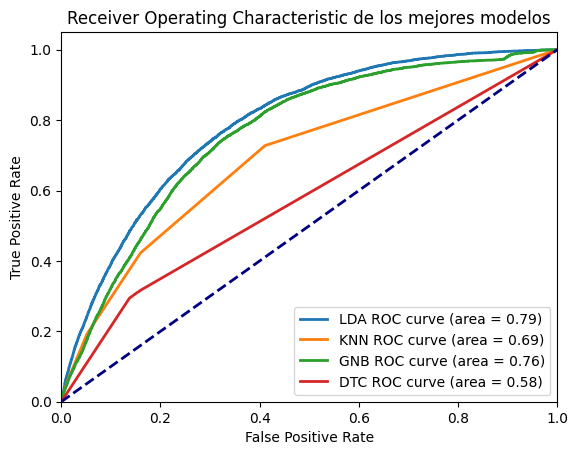

In [ ]:
plt.figure()

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener el mejor modelo y el mejor umbral
    best_model = model_data['best_model']
    best_threshold = model_data['best_threshold']

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(X_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Añadir la línea de azar
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustar los límites y etiquetas de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Añadir título y leyenda
plt.title('Receiver Operating Characteristic de los mejores modelos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()


In [457]:
from scipy.stats import f_oneway

# Extraer los errores de prueba de cada modelo
gnb_errors = model_info['GNB']['test_errors']
knn_errors = model_info['KNN']['test_errors']
lda_errors = model_info['LDA']['test_errors']

# Realizar el ANOVA
stat, p = f_oneway(gnb_errors, knn_errors, lda_errors)

print('ANOVA')
print(f'Statistics={stat:.3f}, p={p:.3f}')

# Interpretar
alpha = 0.05
if p > alpha:
    print('Las medias parecen ser iguales (fail to reject H0)')
else:
    print('Las medias parecen ser diferentes (reject H0)')

ANOVA
Statistics=155.688, p=0.000
Las medias parecen ser diferentes (reject H0)


In [459]:
gnb_errors = model_info['GNB']['test_errors']
print(gnb_errors)

[0.30980392156862746, 0.2991285403050109, 0.31394335511982574, 0.29738562091503273, 0.3178649237472767]


In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Crear un DataFrame con todos los errores de prueba
df_errors = pd.DataFrame({
    'Model': ['GNB']*len(gnb_errors) + ['KNN']*len(knn_errors) + ['LDA']*len(lda_errors),
    'Error': gnb_errors + knn_errors + lda_errors
})

# Realizar la prueba de Tukey HSD
tukey_results = pairwise_tukeyhsd(df_errors['Error'], df_errors['Model'], alpha=0.05)

# Imprimir los resultados
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   GNB    KNN  -0.0835    0.0 -0.0921 -0.0749   True
   GNB    LDA  -0.0138 0.0028 -0.0224 -0.0052   True
   KNN    LDA   0.0697    0.0  0.0612  0.0783   True
----------------------------------------------------
